<a href="https://colab.research.google.com/github/beltranovich/MBID_08_PRACTICA/blob/main/MBID_08_Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Inicio</h2>

**Carga de librerias y módulos requeridos**

Para ejecutar el notebook y generar el analisis EDA del problema se requieren cargar librerias que se necesitarán en el transcurso de la practica**

In [3]:
# importación de librerias requeridas

import base64  # Para manipulación de datos en formato base64
import folium  # Para visualización de mapas interactivos
from IPython.display import display # Para hacer graficas sencillas
import json  # Para manipulación de datos en formato JSON
import matplotlib.pyplot as plt  # Para generar gráficos y visualizaciones
import numpy as np  # Para manipulación de arreglos y cálculos numéricos
import pandas as pd  # Para manipulación y análisis de datos en forma de DataFrames
import plotly.graph_objects as go # libreria para convertir figuras en html
import requests # obtener datos de un API
import seaborn as sns  # Para visualización de gráficos estadísticos

# !pip install pingouin -q # esta linea de código se ejecuta la primera vez para cargar la libreria pingouin
import pingouin as pg  # Para realizar análisis estadísticos

__________________

**Carga del fichero CSV (en linea)**  

Con el fin de establecer la fuente de datos en el DataFrame de la practica**

Las opciones adicionales configuradas en la instrucción .read_csv() fueron requeridas para lograr la carga del archivo de aprox 450MB:  
- on_bad_lines='skip' permite seguir cargando el csv a pesar de errores que puedan tener los renglones
- low_memory=False permite aumentar la capacidad de procesamiento y al ram al momento de leer el archivo tan pesado

In [2]:
# dirección url donde se encuentran los datos (en un fichero CSV) para analizar
url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv"

# creación del dataframe con la data proveniente del csv
data = pd.read_csv(url, delimiter=',', low_memory=False, on_bad_lines='skip')

___________________

**Primer acercamiento a los datos:**

Visualizar con la instrucción .info() la información relevante del Dataframe:

In [4]:
# información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007281 entries, 0 to 2007280
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

- nombre de las columnas  
- tipos de datos: 4 flotantes, 7 enteros y 18 objetos  
- cantidad de columnas: 29  
- cantidad de filas: 2'007.281
___________________________

Vamos a realizar un procedimiento de extracción de información de la pagina web  (https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95) donde se puede descargar un archivo excel con la descripción de las 29 columnsa

In [5]:
# Cargar el archivo Excel desde la URL
url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/files/bd7ab0b2-d48c-48c4-a0a5-590d31a3e120?download=true&filename=MVCollisionsDataDictionary_20190813_ERD.xlsx"
df = pd.read_excel(url, sheet_name='Column Info', header=1)

# Seleccionar las primeras 3 columnas del DataFrame
df = df.iloc[:, :3]

# Filtrar las filas que contienen el texto "MV-Collisions - Crash" en la primera columna
df = df[df.iloc[:, 0] == "MV-Collisions - Crash"]

# Seleccionar las columnas 2 y 3 del DataFrame resultante
df_info = df.iloc[:, [1, 2]]

# Renombrar las columnas "Column Name" y "Column Description"
df_info = df_info.rename(columns={"Column Name": "Nombre", "Column Description": "Descripcion"})
df_info

,Nombre,Descripcion
0,COLLISION_ID,Unique record code generated by system
1,ACCIDENT_DATE,Occurrence date of collision
2,ACCIDENT_TIME,Occurrence time of collision
3,BOROUGH,Borough where collision occurred
4,ZIP CODE,Postal code of incident occurrence
5,LATITUDE,Latitude coordinate for Global Coordinate Syst...
6,LONGITUDE,Longitude coordinate for Global Coordinate Sys...
7,LOCATION,"Latitude , Longitude pair"
8,ON STREET NAME,Street on which the collision occurred
9,CROSS STREET NAME,Nearest cross street to the collision


Cabe aclarar que las descripciones están en inglés, pero sirven de guia para entender su contenido. Con respecto al archivo xlsx visualizado se observa una diferencia en el nombre dos columnas:
- ACCIDENT_DATE = CRASH DATE
- ACCIDENT_TIME = CRASH TIME
________________________

Vamos a visualizar la cabecera (10 filas) del conjunto de datos para corroborar la información:

In [6]:
data.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


Como la generación del DataFrame 'data' tomó tanto tiempo al descargar el archivo csv de 450MB aprox, vamos a generar una copia para usarla en caso de ser necesario

In [7]:
data_copia = data.copy()

_________________

<h2>KDD Inicial</h2>

El proceso de KDD (Knowledge Discovery in Databases) es un enfoque sistemático utilizado para descubrir conocimiento útil y relevante a partir de grandes volúmenes de datos. Este proceso consta de varias etapas que se realizan de manera secuencial para obtener información valiosa y significativa. A continuación, se presenta un resumen de las etapas del proceso de KDD que vamos aplciar:

- Selección o Filtrado de Datos
- Preprocesamiento de datos
- Transformación de datos
- Tratamiento de Missing Values

Nota aclaratoria: Con el fin de mantener en el html de stackblitz una referencia con la pagina donde se obtienen los datos, no se van a cambiar los nombres de las columnas a español. Solo las graficas (titulos, labels, nombre de ejes, etc) tendrán nombres en español.


**Filtrado de Datos**  

Vamos a eliminar las columnas que no requerimos para este EDA:
- ZIP CODE
- LOCATION

In [8]:
data.drop(['ZIP CODE', 'LOCATION'], axis=1, inplace=True)
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,NaN,NaN,1211 LORING AVENUE,0.0,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


______________

**Evaluación de Missing Values**  

Observación de datos perdidos por cada columna:

In [9]:
# Revisión de 'Missing Values'
data.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           624452
LATITUDE                          228873
LONGITUDE                         228873
ON STREET NAME                    421578
CROSS STREET NAME                 749774
OFF STREET NAME                  1678074
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6285
CONTRIBUTING FACTOR VEHICLE 2     305496
CONTRIBUTING FACTOR VEHICLE 3    1865179
CONTRIBUTING FACTOR VEHICLE 4    1975430
CONTRIBUTING FACTOR VEHICLE 5    1998687
COLLISION_ID                           0
VEHICLE TYPE CODE 1                12526
VEHICLE TYPE CODE 2               373466
VEHICLE TYPE COD

Con base a la información de *missing values*, la cual está muy dispersa, podemos realizar diferentes tipos de análisis sin eliminar columnas o renglones.
________________________

**Transformación de Datos**  

Vamos a realizar las siguientes transformaciones:
- 'CRASH DATE' de Object a Datetime
- 'CRASH TIME' de Object a String
- 'BOROUGH'    de Object a Category

In [11]:
# Convertir 'CRASH DATE' de Object a Date
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'], format='%m/%d/%Y')

# Convertir 'CRASH TIME' de Object a Time
data['CRASH TIME'] = data['CRASH TIME'].astype('str')

# Convertir 'BOROUGH' de Object a Category
data['BOROUGH'] = data['BOROUGH'].astype('category')

In [12]:
data['BOROUGH'].unique()

[NaN, 'BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
Categories (5, object): ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

De acuerdo a la visualización de valores perdidos, tendremos 624452 accidentes donde no se logrará distinguir el distrito (BOROUGH)
______________________

**TOTAL DE ACCIDENTES A TRAVES DEL TIEMPO**  

En esta sección, exploraremos la evolución del total de accidentes a lo largo del tiempo en Nueva York. Analizaremos el dataset y examinaremos cómo ha variado la cantidad de accidentes a través de los años. Este análisis es de gran importancia, ya que podremos saber sí el proyecto Vision Zero, el cual busca reducir los accidentes de tránsito a cero, ha funcionado o no.  

Mediante técnicas de visualización de datos, podremos identificar tendencias y patrones en la ocurrencia de accidentes, proporcionando información valiosa para mejorar la seguridad vial en la ciudad.

In [13]:
def accidente_x_mes(df):
    accidentes_por_mes = pd.to_datetime(data['CRASH DATE']).dt.to_period('M')
    accidentes_por_mes = df.groupby(accidentes_por_mes).size()
    return accidentes_por_mes

<Figure size 3200x3200 with 0 Axes>

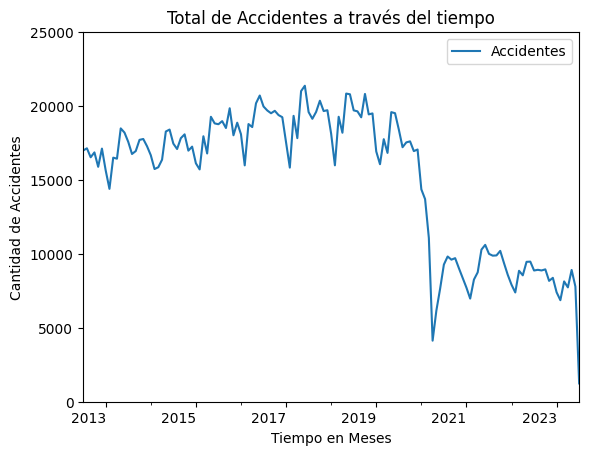

In [14]:
plot1 = pd.DataFrame(accidente_x_mes(data)).reset_index()
plot1.columns = ['Tiempo en Meses','Cantidad de Accidentes']

# Ajustar el tamaño de la figura
plt.figure(figsize=(32,32))

plot1.plot(x='Tiempo en Meses', y='Cantidad de Accidentes')

plt.ylabel('Cantidad de Accidentes')
plt.ylim(0, 25000)
plt.title('Total de Accidentes a través del tiempo')
plt.xticks(rotation=0, ha='right')

plt.legend(['Accidentes'])

plt.show()

_________________

**CANTIDAD DE ACCIDENTES POR HORA DEL DIA**

En esta sección, examinaremos la distribución de los accidentes de tránsito según la hora del día en la ciudad de Nueva York. El objetivo es identificar las horas del día en las que se producen más accidentes y comprender mejor los patrones de ocurrencia.

Analizaremos el dataset y utilizaremos técnicas de visualización para mostrar la cantidad de accidentes en cada hora del día. Esto nos permitirá identificar las horas pico de accidentes y proporcionar información relevante para la implementación de medidas de seguridad vial en esos momentos específicos.

In [17]:
def accidente_x_hora(df):
    df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.hour
    accidentes_por_hora = df.groupby('CRASH HOUR').size()
    return accidentes_por_hora

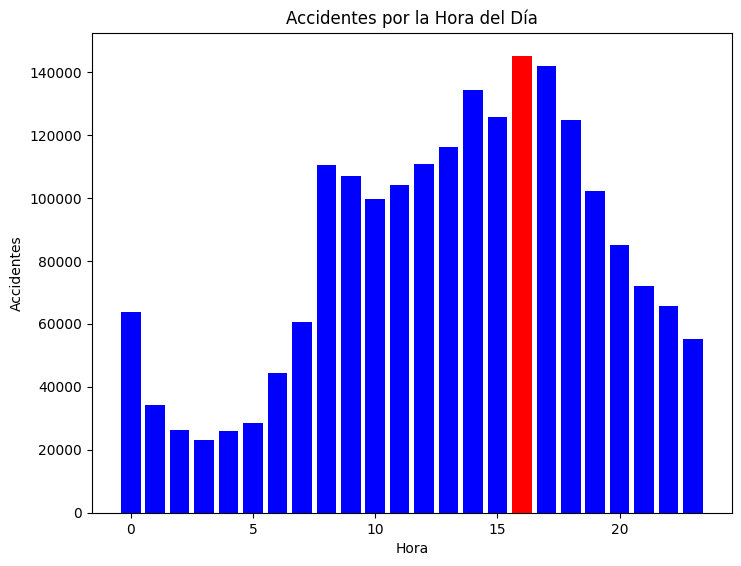

In [23]:
plot2 = pd.DataFrame(accidente_x_hora(data)).reset_index()
plot2.columns = ['Hora', 'Cantidad de Accidentes']

fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
bar_colors = ['blue' if h != plot2['Cantidad de Accidentes'].max() else 'red' for h in plot2['Cantidad de Accidentes']]
ax.bar(plot2['Hora'], plot2['Cantidad de Accidentes'], color=bar_colors)
ax.set_ylabel('Accidentes')
ax.set_xlabel('Hora')
ax.set_title('Accidentes por la Hora del Día')
plt.show()

_______________________

**CANTIDAD DE ACCIDENTES POR DIA DE LA SEMANAA**

En esta sección, exploraremos la cantidad de accidentes registrados en Nueva York según el día de la semana. El análisis de los accidentes por día de la semana nos proporciona información clave para identificar los días en los que hay una mayor incidencia de accidentes y tomar medidas preventivas adecuadas.

Mediante técnicas de visualización de datos, examinaremos cómo varía la cantidad de accidentes a lo largo de los diferentes días de la semana. Esto nos permitirá detectar patrones y tendencias que nos ayudarán a comprender mejor las circunstancias que pueden contribuir a un mayor número de accidentes en ciertos días.

In [24]:
def accidentes_x_dia_semana(df):
    df['WD_A'] = pd.to_datetime(df['CRASH DATE']).dt.weekday
    accidente_por_dia_semana = df.groupby('WD_A').size()
    return accidente_por_dia_semana

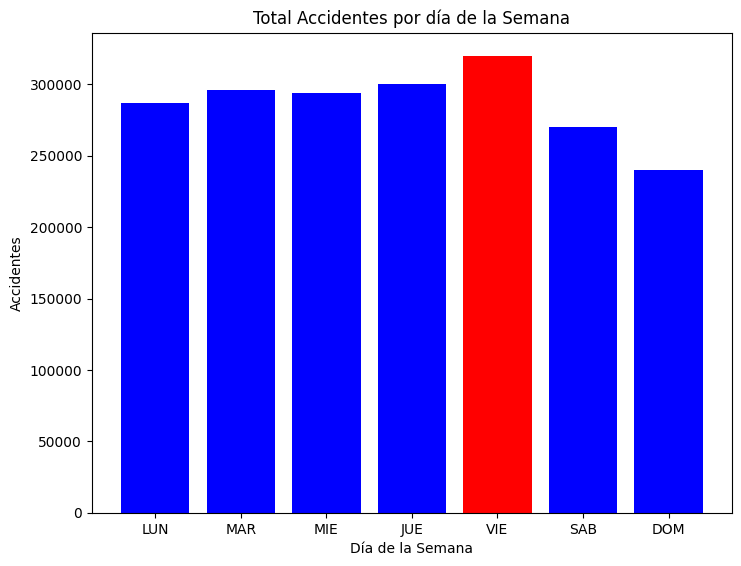

In [29]:
plot3 = pd.DataFrame(accidentes_x_dia_semana(data)).reset_index()
plot3.columns = ['Dia Semana','Cantidad de Accidentes']
plot3['Week_Day'] = ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"] # 1==Lunes

fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
bar_colors = ['blue' if c != plot3['Cantidad de Accidentes'].max() else 'red' for c in plot3['Cantidad de Accidentes']]
ax.bar(plot3['Week_Day'], plot3['Cantidad de Accidentes'], color=bar_colors)
ax.set_ylabel('Accidentes')
ax.set_xlabel('Día de la Semana')
ax.set_title('Total Accidentes por día de la Semana')

plt.show()